In [1]:
import sys
import matplotlib
import numpy
import pandas
import scipy
import sklearn



print("Python: ", sys.version)
print("Matplotlib: ", matplotlib.__version__)
print("Numpy: ", numpy.__version__)
print("Pandas: ", pandas.__version__)
print("Scipy: ", scipy.__version__)
print("Sklearn: ", sklearn.__version__)

Python:  3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Matplotlib:  3.1.1
Numpy:  1.16.5
Pandas:  0.25.1
Scipy:  1.3.1
Sklearn:  0.21.3


In [2]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [14]:
url = "datasets/dataset1.csv"
dataset = pandas.read_csv(url)

In [15]:
dataset.shape

(327322, 13)

In [16]:
dataset.head(20)

,year,month,day,page,image,x1,y1,x2,y2,crop.accuracy,gender,gender.accuracy,issue
0,1923,3,10,1.0,1923-03-10 page 1 face1.png,258,610,705,1118,0.991561,male,0.999919,10-03-23
1,1923,3,10,10.0,1923-03-10 page 10 face1.png,503,315,567,392,0.976006,male,0.999178,10-03-23
2,1923,3,10,11.0,1923-03-10 page 11 face1.png,436,300,647,564,0.992560,male,0.999984,10-03-23
3,1923,3,10,13.0,1923-03-10 page 13 face1.png,458,315,628,532,0.998016,male,0.999997,10-03-23
4,1923,3,10,14.0,1923-03-10 page 14 face1.png,441,397,650,672,0.997483,male,0.995122,10-03-23
5,1923,3,10,16.0,1923-03-10 page 16 face1.png,511,461,613,596,0.992880,female,0.892962,10-03-23
6,1923,3,10,20.0,1923-03-10 page 20 face1.png,475,462,665,689,0.982528,male,0.999994,10-03-23
7,1923,3,10,29.0,1923-03-10 page 29 face1.png,540,208,616,311,0.990433,male,0.999999,10-03-23
8,1923,3,10,32.0,1923-03-10 page 32 face1.png,406,308,501,411,0.976199,male,0.999495,10-03-23
9,1923,3,10,4.0,1923-03-10 page 4 face1.png,430,603,606,824,0.996399,male,0.999993,10-03-23


In [17]:
dataset.describe()

,year,month,day,page,x1,y1,x2,y2,crop.accuracy,gender.accuracy
count,327322.000000,327322.000000,327322.000000,327321.000000,327322.000000,327322.000000,327322.000000,327322.000000,327322.000000,327322.000000
mean,1972.239773,6.578733,18.935687,52.696827,487.225377,556.949386,619.914525,715.771500,0.975717,0.960393
std,23.715097,3.443489,7.505819,33.776770,258.734512,338.477522,259.145800,335.994693,0.023837,0.096585
min,1923.000000,1.000000,1.000000,1.000000,0.000000,0.000000,41.000000,62.000000,0.900002,0.500005
25%,1952.000000,4.000000,14.000000,25.000000,268.000000,265.000000,399.000000,432.000000,0.965346,0.986296
50%,1973.000000,7.000000,19.000000,48.000000,480.000000,498.000000,627.000000,666.000000,0.984844,0.999594
75%,1994.000000,10.000000,25.000000,76.000000,709.000000,810.000000,839.000000,968.000000,0.993537,0.999987
max,2014.000000,12.000000,31.000000,257.000000,1114.000000,1470.000000,1194.000000,1549.000000,0.999982,1.000000


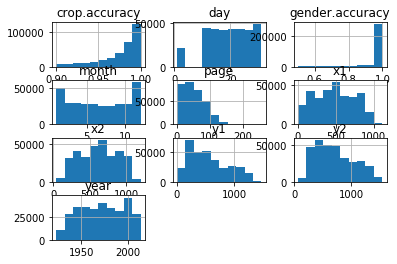

In [18]:
dataset.hist()
plt.show()

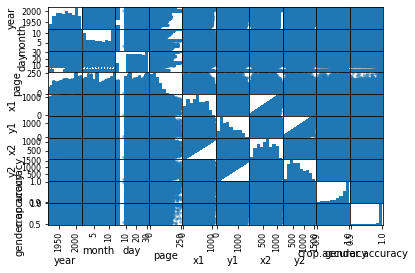

In [19]:
scatter_matrix(dataset)
plt.show()